In [34]:
from __future__ import print_function, division
from builtins import range, input

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [13]:
TRAINING_DIR      = '/home/nolan/Documents/intel/Training'
TESTING_DIR       = '/home/nolan/Documents/intel/Test'
IMAGE_SIZE = [100, 100]
epochs = 10
batch_size = 32

In [14]:
image_files = glob(TRAINING_DIR + '/*/*.jp*g')
valid_image_files = glob(TESTING_DIR + '/*/*.jp*g')
folders = glob(TRAINING_DIR + '/*')

In [45]:
vgg = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(100, 100, 3))

In [46]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
prediction = Dense(131, activation='softmax')(x)

In [54]:
model = Sequential()
model.add(vgg) # Ajout du modèle VGG16
model.add(Flatten()) 
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(131, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [55]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

In [49]:
# create an instance of ImageDataGenerator
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [50]:
# create generators
train_generator = gen.flow_from_directory(
  TRAINING_DIR,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  TESTING_DIR,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


/tmp/ipykernel_8048/2140459382.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
30/30 [==============================] - 136s 5s/step - loss: 6.5527 - accuracy: 0.0818 - val_loss: 4.2654 - val_accuracy: 0.1505
Epoch 2/10
30/30 [==============================] - 140s 5s/step - loss: 3.4728 - accuracy: 0.2599 - val_loss: 3.3585 - val_accuracy: 0.2870
Epoch 3/10
30/30 [==============================] - 141s 5s/step - loss: 2.3814 - accuracy: 0.4458 - val_loss: 2.4727 - val_accuracy: 0.4609
Epoch 4/10
30/30 [==============================] - 141s 5s/step - loss: 1.7084 - accuracy: 0.5656 - val_loss: 1.8460 - val_accuracy: 0.5677
Epoch 5/10
30/30 [==============================] - 143s 5s/step - loss: 1.3261 - accuracy: 0.6552 - val_loss: 1.4383 - val_accuracy: 0.6495
Epoch 6/10
30/30 [==============================] - 140s 5s/step - loss: 1.0172 - accuracy: 0.7214 - val_loss: 1.6333 - val_accuracy: 0.6318
Epoch 7/10
30/30 [==============================] - 140s 5s/step - loss: 0.9414 - accuracy: 0.7406 - val_loss: 1.2264 - val_accuracy: 0.6927
Epoch 8/10
30

In [52]:
def diagnostic_learning_curves(history = r):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

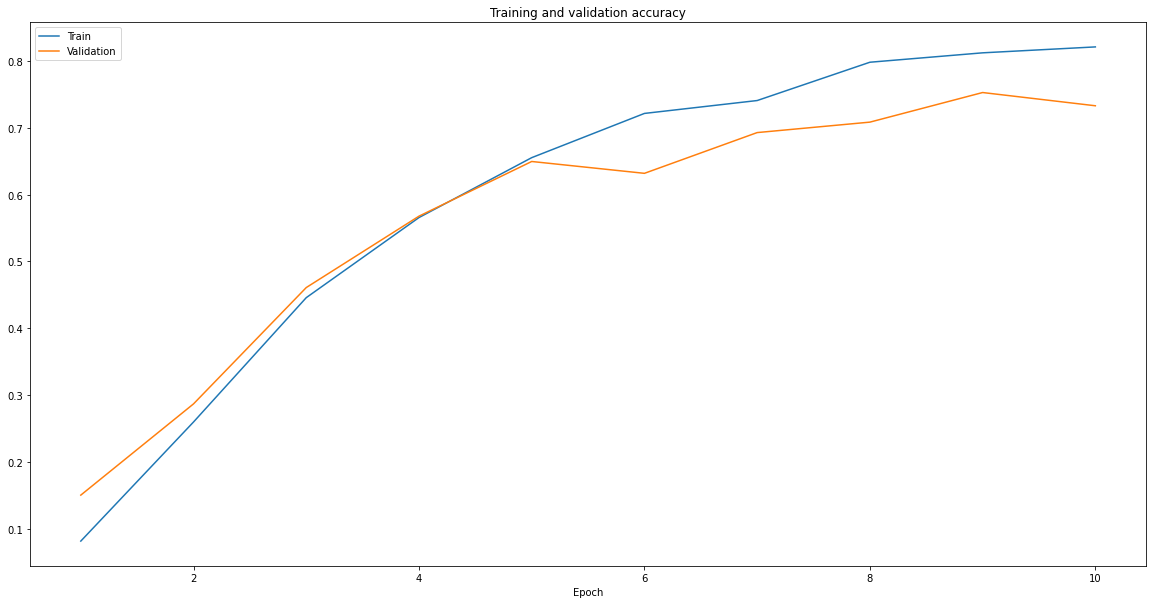

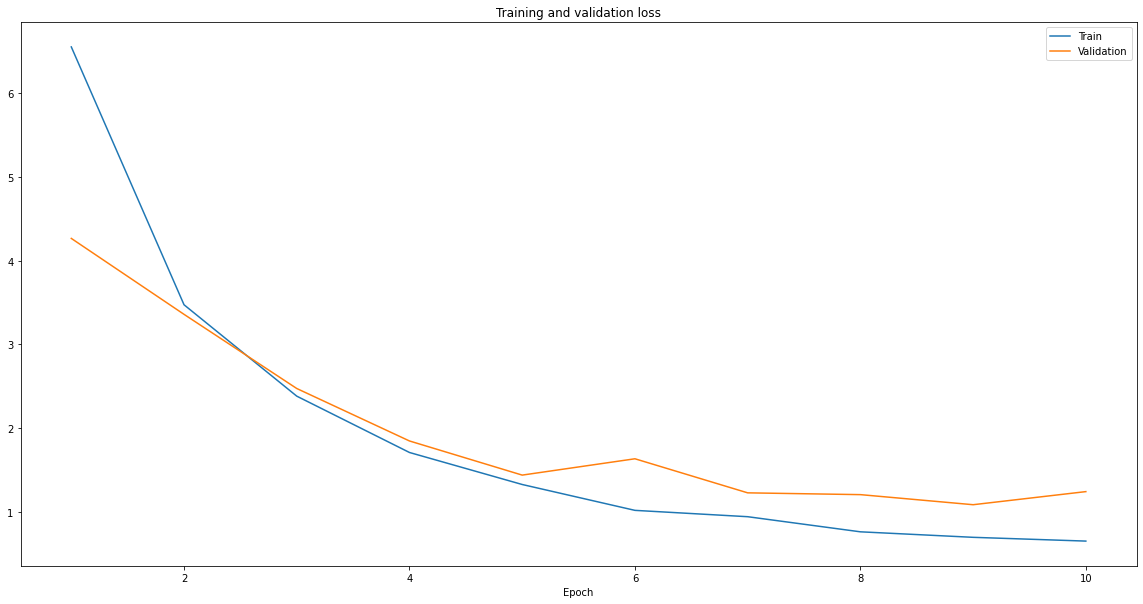

In [53]:
diagnostic_learning_curves()

In [56]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=10,
  steps_per_epoch=30,
  validation_steps=30,
)

/tmp/ipykernel_8048/2140459382.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
30/30 [==============================] - 145s 5s/step - loss: 34.9401 - accuracy: 0.2594 - val_loss: 2.9698 - val_accuracy: 0.3755
Epoch 2/10
30/30 [==============================] - 150s 5s/step - loss: 2.6736 - accuracy: 0.4984 - val_loss: 2.7527 - val_accuracy: 0.5016
Epoch 3/10
30/30 [==============================] - 148s 5s/step - loss: 2.1718 - accuracy: 0.6016 - val_loss: 2.3677 - val_accuracy: 0.5948
Epoch 4/10
30/30 [==============================] - 149s 5s/step - loss: 1.8071 - accuracy: 0.6703 - val_loss: 1.5793 - val_accuracy: 0.6844
Epoch 5/10
30/30 [==============================] - 148s 5s/step - loss: 1.2788 - accuracy: 0.7396 - val_loss: 1.7684 - val_accuracy: 0.6823
Epoch 6/10
30/30 [==============================] - 148s 5s/step - loss: 1.0108 - accuracy: 0.7771 - val_loss: 1.7812 - val_accuracy: 0.7135
Epoch 7/10
30/30 [==============================] - 148s 5s/step - loss: 0.9754 - accuracy: 0.8078 - val_loss: 1.9297 - val_accuracy: 0.6922
Epoch 8/10
3

In [57]:
def diagnostic_learning_curves(history = r):
    
    # Retrieve a list of accuracy results on training and validation data sets for each training epoch
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    # Retrieve a list of list results on training and validation data sets for each training epoch
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get number of epochs : 1 -> n_epochs
    epochs = range(1, len(loss) + 1)

    # Plot training and validation accuracy per epoch
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, acc)
    plt.plot(epochs, val_acc)
    plt.title('Training and validation accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    
    plt.figure(figsize = (20, 10))

    # Plot training and validation loss per epoch
    plt.plot(epochs, loss)
    plt.plot(epochs, val_loss)
    plt.title('Training and validation loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper right')

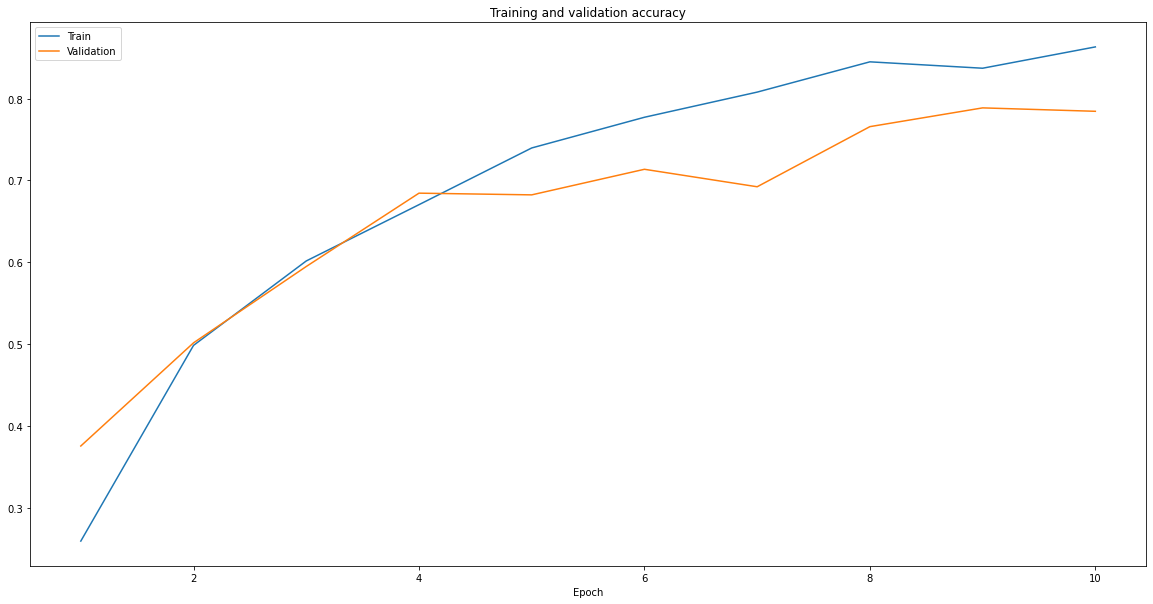

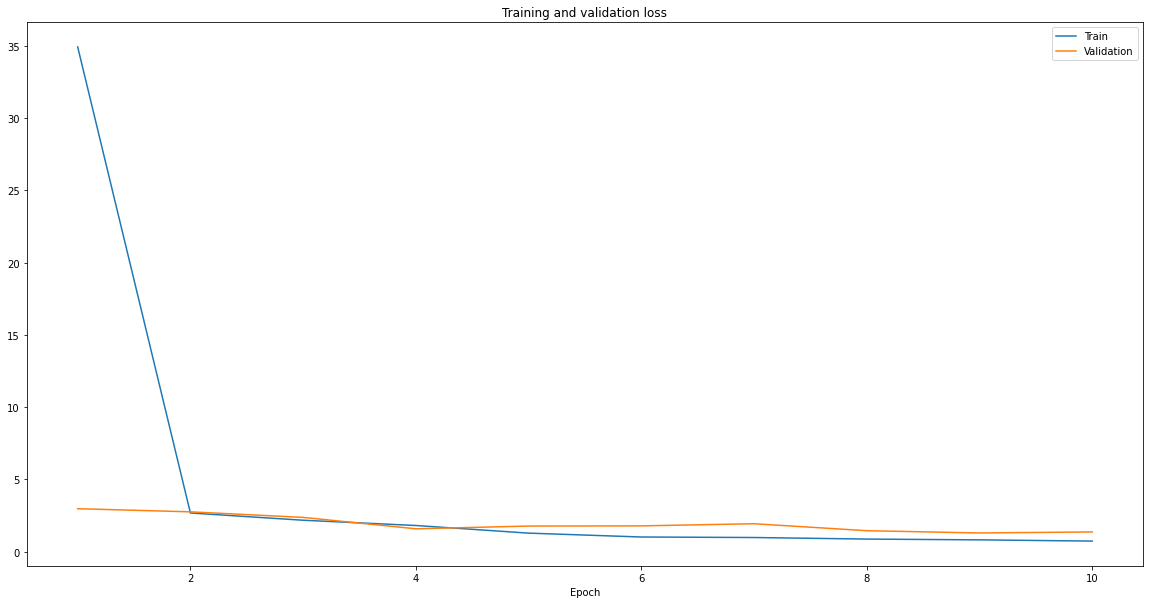

In [58]:
diagnostic_learning_curves()